We will be analyzing the NHTSA recall dataset found here: https://www.nhtsa.gov/nhtsa-datasets-and-apis

This dataset is a list of the characteristics of every US automotive recall from 1963 to present day. In this notebook we will take the last 10 years of data on US Automotive recalls and do a basic estimate of TAM SAM and SOM for Axion Ray in the US Automotive recall sector.

Below is an outline of what our data looks like:

In [1]:
import pandas as pd
df = pd.read_csv('./data/Recalls_Data.csv')
df.head()

,Report Received Date,NHTSA ID,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action,Park Outside Advisory,Do Not Drive Advisory
0,05/25/2023,23V369000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Jaguar Land Rover North America, LLC",High-Voltage Battery May Overheat,ELECTRICAL SYSTEM,H441,Vehicle,6367.0,"Jaguar Land Rover North America, LLC (Jaguar) ...",The high-voltage battery overheating increases...,The battery energy control module software wil...,No,No
1,05/24/2023,23V364000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Grand Design RV, LLC",Missing Emergency Exit Window,STRUCTURE,910035,Vehicle,232.0,"Grand Design RV, LLC (Grand Design) is recalli...",A missing emergency exit window could prevent ...,Dealers will replace the window with an emerge...,No,No
2,05/24/2023,23V363000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"ST Engineering Hackney, Inc",Suspension Pivot Bolt Improperly Tightened,SUSPENSION,NR (Not Reported),Vehicle,120.0,"ST Engineering Hackney, Inc. (STE Hackney) is ...","Improperly tightened pivot bolts may fail, cau...","Dealers will inspect, and if necessary, tighte...",No,No
3,05/22/2023,23V362000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Nissan North America, Inc.",Corrosion in Brake Line May Cause Brake Fluid ...,"SERVICE BRAKES, HYDRAULIC",PC976,Vehicle,758.0,"Nissan North America, Inc. (Nissan) is recalli...",A brake fluid leak can reduce braking performa...,Dealers will inspect and replace the right-han...,No,No
4,05/19/2023,23V360000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Mercedes-Benz USA, LLC",Electronic Stability Control Software Error,ELECTRONIC STABILITY CONTROL,NR (Not Reported),Vehicle,7558.0,"Mercedes-Benz USA, LLC (MBUSA) is recalling ce...","Disabled vehicle dynamics control systems, inc...",Dealers will update the ESP control unit softw...,No,No


For each company we find the total number of recalls, potentially affected vehicles, and estimated yearly $ spent on recalls. 

In [2]:
df['Report Received Date'] = pd.to_datetime(df['Report Received Date'])
df = df[df['Report Received Date'] >= pd.to_datetime('2013-05-31')]

summary_df = df.groupby('Manufacturer').agg({
    'Manufacturer': 'count',
    'Potentially Affected': 'sum'
}).rename(columns={'Manufacturer': 'Total Recalls', 'Potentially Affected': 'Total Potentially Affected'})

summary_df['Yearly $ Amount'] = (summary_df['Total Potentially Affected'] * 500) / 10

pd.options.display.float_format = '{:,.0f}'.format
summary_df = summary_df.sort_values('Total Recalls', ascending=False)
summary_df

,Total Recalls,Total Potentially Affected,Yearly $ Amount
Manufacturer,,,
"Forest River, Inc.",444,"758,195","37,909,750"
Ford Motor Company,419,"54,915,123","2,745,756,150"
"Chrysler (FCA US, LLC)",399,"57,441,541","2,872,077,050"
"General Motors, LLC",346,"61,292,215","3,064,610,750"
"Daimler Trucks North America, LLC",337,"2,469,706","123,485,300"
...,...,...,...
"Jumping Jack, Inc.",1,300,"15,000"
"K&N Engineering, Inc.",1,"134,674","6,733,700"
"Keyline Sales, Inc.",1,277,"13,850"


Given each potentially affected vehicle costs on average $500, we project the yearly cost of recalls to each company as:

Yearly Dollar Amount = Total Potentially Affected (over the last 10 years) * 500 dollars / 10 years

We see there are 1043 unique companies in the US that have at least 1 recall in the last 10 years.

We will estimate the TAM as 1 percent of the average total yearly amount spent on recalls. The estimated total is shown below.

In [3]:
tam = summary_df['Yearly $ Amount'].sum() * 0.01
print('Estimated TAM:', "${:,.2f}".format(tam))

Estimated TAM: $253,584,328.50


Next we will estimate the SAM. We will only consider companies that have recalls often and spend a lot. For this, we consider only companies that spend over $500k a year on recalls and have experienced at least 10 recalls over the past 10 years.

In [4]:
yearly_over500 = summary_df[summary_df['Yearly $ Amount'] >= 500000]
over500_over10 = yearly_over500[yearly_over500['Total Recalls'] >= 10]
over500_over10

,Total Recalls,Total Potentially Affected,Yearly $ Amount
Manufacturer,,,
"Forest River, Inc.",444,"758,195","37,909,750"
Ford Motor Company,419,"54,915,123","2,745,756,150"
"Chrysler (FCA US, LLC)",399,"57,441,541","2,872,077,050"
"General Motors, LLC",346,"61,292,215","3,064,610,750"
"Daimler Trucks North America, LLC",337,"2,469,706","123,485,300"
...,...,...,...
Hale Products Inc,10,"65,322","3,266,100"
Harbor Freight Tools,10,"3,455,570","172,778,500"
"Gulf States Toyota, Inc.",10,"24,623","1,231,150"


There are 96 companies that fit this profile. We will estimate the SAM in the same fashion as we did above. We will simply take 1% of the total yearly amount spent on recalls. The result is again shown below.

In [5]:
sam = over500_over10['Yearly $ Amount'].sum() * 0.01
print('Estimated SAM:', "${:,.2f}".format(sam))

Estimated SAM: $228,842,699.00


For our SOM, we will estimate that only 10 of the 96 companies will purchase our product. So, we will take our SOM = SAM * 10/96

In [6]:
print('Estimated SOM:', "${:,.2f}".format(sam*(10/96)))

Estimated SOM: $23,837,781.15


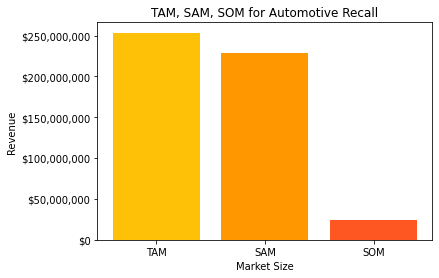

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define TAM, SAM, and SOM values
TAM = tam
SAM = sam
SOM = sam*(10/96)

# Create a bar chart
labels = ['TAM', 'SAM', 'SOM']
values = [TAM, SAM, SOM]
colors = ['#FFC107', '#FF9800', '#FF5722']

plt.bar(labels, values, color=colors)

# Format y-axis tick labels with commas
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Add labels and title
plt.xlabel('Market Size')
plt.ylabel('Revenue')
plt.title('TAM, SAM, SOM for Automotive Recall')

# Display the graph
plt.show()